In [1]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder
import pyECLAT as pe
import numpy as np
import warnings
import matplotlib.pyplot as plt
import time
warnings.filterwarnings("ignore")

In [2]:
folder = '/Users/lam.nguyen/Desktop/GithubClone/KPDL_Final'

Read data


In [3]:
books = pd.read_csv(folder + '/Books.csv')

# Apriori

In [4]:
# Nếu dữ liệu đã ở dạng nhị phân (0 và 1), dòng dưới đây sẽ chuyển đổi sang kiểu Boolean
apriori_data = books.applymap(lambda x: True if x == 1 else False)

apriori_data = apriori_data.astype(bool)
print(apriori_data.head())

   Child  Youth   Cook  Science  Music    Art   Geog  Sport  Tourism  \
0  False   True  False     True  False  False   True  False    False   
1   True  False  False    False  False  False  False  False    False   
2  False  False  False    False  False  False  False  False    False   
3   True   True   True    False   True  False   True  False    False   
4  False  False   True    False  False  False   True  False    False   

   Business     IT  
0     False  False  
1     False  False  
2     False  False  
3     False  False  
4     False  False  


In [5]:
# Tính các tập phổ biến có min_support = 10% 
frequent_itemsets = apriori(apriori_data, min_support=0.2, use_colnames=True)

print("\n=== Apriori - Các tập phổ biến ===")
print(frequent_itemsets)


=== Apriori - Các tập phổ biến ===
   support       itemsets
0   0.4230        (Child)
1   0.2475        (Youth)
2   0.4310         (Cook)
3   0.2820      (Science)
4   0.2145        (Music)
5   0.2410          (Art)
6   0.2760         (Geog)
7   0.2560  (Child, Cook)


In [6]:
# Tính số lượng itemsets dựa vào frequent_itemsets
num_itemsets_apriori = len(frequent_itemsets)

# Khởi tạo luật kết hợp dựa trên frequent_itemsets đó
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets_apriori, metric="confidence", min_threshold=0.2)


print("Luật kết hợp:")
print(rules)

Luật kết hợp:
  antecedents consequents  antecedent support  consequent support  support  \
0     (Child)      (Cook)               0.423               0.431    0.256   
1      (Cook)     (Child)               0.431               0.423    0.256   

   confidence      lift  representativity  leverage  conviction  \
0    0.605201  1.404179               1.0  0.073687    1.441240   
1    0.593968  1.404179               1.0  0.073687    1.421069   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.498856  0.428094   0.306153    0.599584  
1       0.505870  0.428094   0.296304    0.599584  


# FP-growth

In [7]:
# # Tính toán các tập hợp thường gặp bằng FP-Growth
# frequent_itemsets_fp = fpgrowth(books, min_support=0.01, use_colnames=True)

# # Kiểm tra kết quả
# print(frequent_itemsets_fp)
# # Tạo các quy tắc kết hợp
# rules_fp = association_rules(frequent_itemsets_fp, num_itemsets=num_itemsets_fp, metric="lift", min_threshold=1)

# FP-Growth Algorithm
frequent_itemsets_fp = fpgrowth(books, min_support=0.2, use_colnames=True)
num_itemsets_fp = len(frequent_itemsets_fp)
rules_fp = association_rules(frequent_itemsets_fp, num_itemsets=num_itemsets_fp, metric="confidence", min_threshold=0.2)

#Displaying results for FP-Growth
print("\n=== FP-Growth - Các tập phổ biến ===")
fp_results = frequent_itemsets_fp[['itemsets', 'support']].sort_values(by='support', ascending=False)
print(fp_results)

print("\n=== Strong Association Rules (FP-Growth) ===")
fp_rules_results = rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending=False)
print(fp_rules_results)



=== Strong Association Rules (FP-Growth) ===
  antecedents consequents  support  confidence      lift
0     (Child)      (Cook)    0.256    0.605201  1.404179
1      (Cook)     (Child)    0.256    0.593968  1.404179


# ECLAT
- Về cách thức code để chạy thuật toán ECLAT, nhóm có tham khảo cách làm trên trang web: [Implementation of ECLAT algorithm using Python
](https://hands-on.cloud/implementation-of-eclat-algorithm-using-python/)

In [8]:
# Chuyển đổi dữ liệu sang horizational format
result = books.apply(lambda row: [col for col, val in row.items() if val == 1] + [None] * (len(books.columns) - sum(row)), axis=1)

# Chuyển đổi kết quả về dataframe mới
result_df = pd.DataFrame(result.tolist(), columns=books.columns)

# Thay đổi header thành số 0, 1, 2, 3,...
result_df.columns = range(len(result_df.columns))

# Hiển thị kết quả
result_df

,0,1,2,3,4,5,6,7,8,9,10
0,Youth,Science,Geog,None,None,None,None,None,None,None,None
1,Child,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None
3,Child,Youth,Cook,Music,Geog,None,None,None,None,None,None
4,Cook,Geog,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1995,Cook,Art,Geog,Sport,Business,IT,None,None,None,None,None
1996,None,None,None,None,None,None,None,None,None,None,None
1997,None,None,None,None,None,None,None,None,None,None,None
1998,Cook,None,None,None,None,None,None,None,None,None,None


In [9]:
# Replace None with NaN
result_df = result_df.replace({None: np.nan})

# Hiển thị kết quả
result_df

,0,1,2,3,4,5,6,7,8,9,10
0,Youth,Science,Geog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Child,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Child,Youth,Cook,Music,Geog,NaN,NaN,NaN,NaN,NaN,NaN
4,Cook,Geog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,Cook,Art,Geog,Sport,Business,IT,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,Cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
eclat_instance = pe.ECLAT(data=result_df,verbose=True)
# the item shoud appear at least at 5% of transactions
min_support = 0.2
# start from transactions containing at least 2 items
min_combination = 1
# up to maximum items per transaction
max_combination = result_df.apply(lambda row: sum(row.notna()), axis=1).max()
rule_indices, rule_supports = eclat_instance.fit(min_support=min_support, min_combination=min_combination, max_combination=max_combination, separator=' & ', verbose=True)

100%|██████████| 11/11 [00:00<00:00, 970.56it/s]


Combination 1 by 1


7it [00:00, 146.87it/s]


Combination 2 by 2


21it [00:00, 186.21it/s]


Combination 3 by 3


35it [00:00, 197.23it/s]


Combination 4 by 4


35it [00:00, 206.19it/s]


Combination 5 by 5


21it [00:00, 188.69it/s]


Combination 6 by 6


7it [00:00, 159.39it/s]


Combination 7 by 7


1it [00:00, 141.50it/s]


Combination 8 by 8


0it [00:00, ?it/s]


Combination 9 by 9


0it [00:00, ?it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 11 by 11


0it [00:00, ?it/s]


In [11]:
result = pd.DataFrame(rule_supports.items(),columns=['Item', 'Support'])
print("\n=== ECLAT - Các tập phổ biến ===")
result.sort_values(by=['Support'], ascending=False)


=== ECLAT - Các tập phổ biến ===


,Item,Support
0,Cook,0.4310
2,Child,0.4230
5,Science,0.2820
6,Geog,0.2760
7,Cook & Child,0.2560
3,Youth,0.2475
1,Art,0.2410
4,Music,0.2145


# Comparison - Time Performance

## Average time and time each loop counts (200 loops)

In [ ]:
loop = 200
apriori_time = []
fpgrowth_time = []
eclat_time = []
for i in range(loop):
    #Time of ECLAT
    eclat_start = time.time()
    eclat_instance = pe.ECLAT(data=result_df,verbose=True)
    # rules_ind, rule_sup = eclat_instance.fit(min_support=min_support, min_combination=min_combination, max_combination=max_combination, separator=' & ', verbose=True)
    eclat_end = time.time()
    eclat_time.append(eclat_end - eclat_start)
    
    #Time of FP-Growth
    fpgrowth_start = time.time()
    fpgrowth_instance = fpgrowth(books, min_support=0.2, use_colnames=True)
    fpgrowth_end = time.time()
    fpgrowth_time.append(fpgrowth_end - fpgrowth_start)

    
    #Time of Apriori
    apriori_start = time.time()
    apriori_instance = apriori(apriori_data, min_support=0.2, use_colnames=True)
    apriori_end = time.time()
    apriori_time.append(apriori_end - apriori_start)




apriori average time: 0.004460804462432862
fp-growth average time: 0.03234910726547241
eclat average time: 0.12857142210006714


Text(0.5, 1.0, 'Thời gian chạy của ECLAT, Apriori và FP-Growth với số vòng lặp tăng')

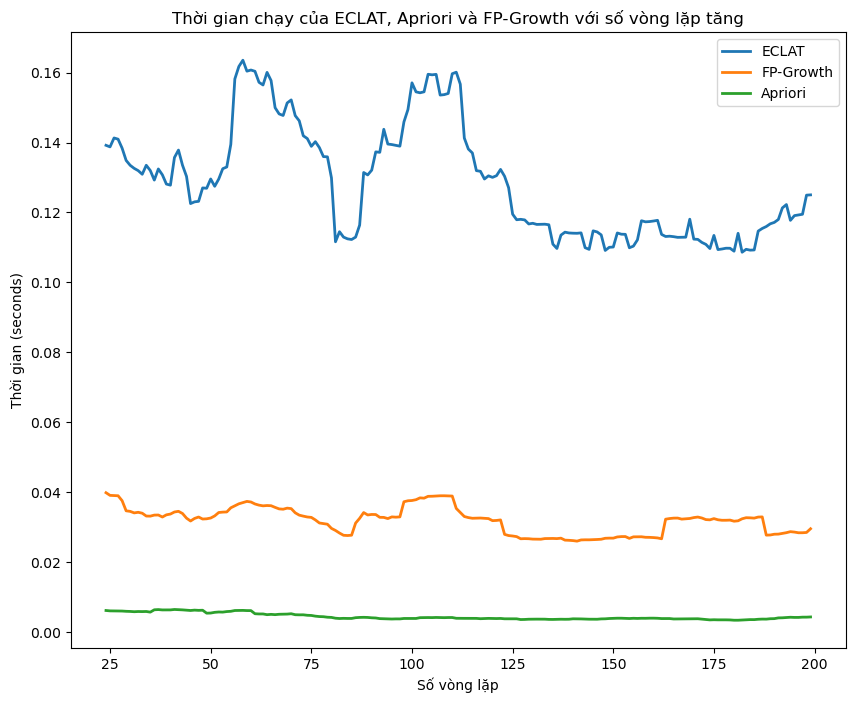

In [13]:
# Calculate moving averages for smoothing
window = 25 # Adjust window size for desired smoothness
eclat_smooth = pd.Series(eclat_time).rolling(window=window).mean()
fpgrowth_smooth = pd.Series(fpgrowth_time).rolling(window=window).mean()
apriori_smooth = pd.Series(apriori_time).rolling(window=window).mean()

print('apriori average time:', sum(apriori_time) / len(apriori_time))
print('fp-growth average time:', sum(fpgrowth_time) / len(fpgrowth_time))
print('eclat average time:', sum(eclat_time) / len(eclat_time))

plt.figure(figsize=(10,8))
plt.plot(range(loop), eclat_smooth, label='ECLAT', linewidth=2)
plt.plot(range(loop), fpgrowth_smooth, label='FP-Growth', linewidth=2)
plt.plot(range(loop), apriori_smooth, label='Apriori', linewidth=2)
plt.legend()
plt.xlabel('Số vòng lặp')
plt.ylabel('Thời gian (seconds)')
plt.title('Thời gian chạy của ECLAT, Apriori và FP-Growth với số vòng lặp tăng')

## When dataset size increases

In [14]:
dataset_size = [size for size in range(100, books.shape[0], 100)]

In [ ]:
apriori_time_size = []
fpgrowth_time_size = []
eclat_time_size = []
for size in dataset_size:
    #Time of FP-Growth
    fpgrowth_start = time.time()
    fpgrowth_instance = fpgrowth(books.iloc[:size], min_support=0.2, use_colnames=True)
    fpgrowth_end = time.time()
    fpgrowth_time_size.append(fpgrowth_end - fpgrowth_start)

    #Time of ECLAT
    eclat_start = time.time()
    eclat_instance = pe.ECLAT(data=result_df.iloc[:size],verbose=True)
    # rules_ind, rule_sup = eclat_instance.fit(min_support=min_support, min_combination=min_combination, max_combination=max_combination, separator=' & ', verbose=True)
    eclat_end = time.time()
    eclat_time_size.append(eclat_end - eclat_start)
    
    #Time of Apriori
    apriori_start = time.time()
    apriori_instance = apriori(apriori_data.iloc[:size], min_support=0.2, use_colnames=True)
    apriori_end = time.time()
    apriori_time_size.append(apriori_end - apriori_start)

apriori average time: 0.005639942068802683
fp-growth average time: 0.019946386939600894
eclat average time: 0.09666081478721217


Text(0.5, 1.0, 'Thời gian chạy của ECLAT, Apriori và FP-Growth khi tăng kích thước dữ liệu')

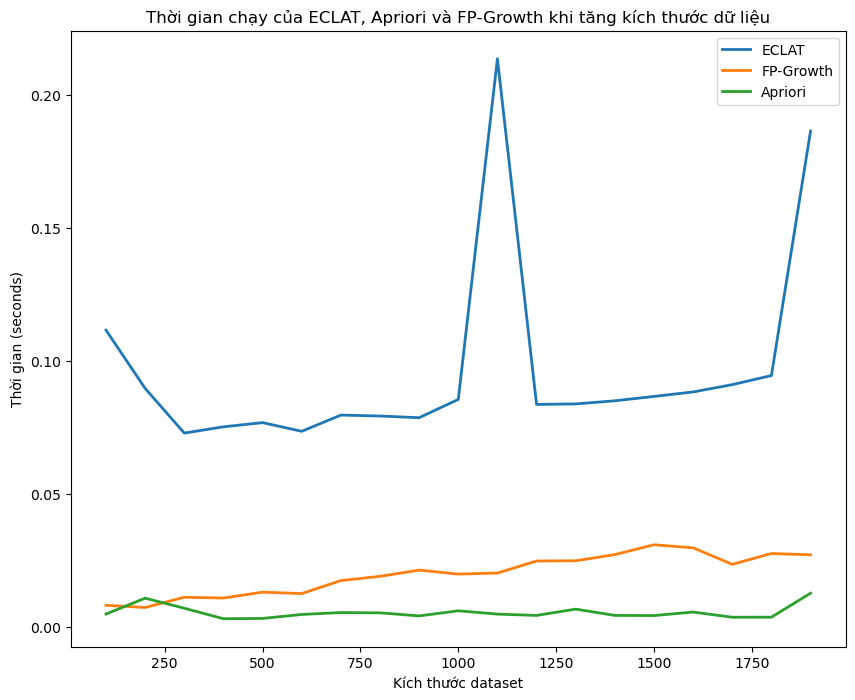

In [16]:
print('apriori average time:', sum(apriori_time_size) / len(apriori_time_size))
print('fp-growth average time:', sum(fpgrowth_time_size) / len(fpgrowth_time_size))
print('eclat average time:', sum(eclat_time_size) / len(eclat_time_size))

plt.figure(figsize=(10,8))
plt.plot(dataset_size, eclat_time_size, label='ECLAT', linewidth=2)
plt.plot(dataset_size, fpgrowth_time_size, label='FP-Growth', linewidth=2)
plt.plot(dataset_size, apriori_time_size, label='Apriori', linewidth=2)
plt.legend()
plt.xlabel('Kích thước dataset')
plt.ylabel('Thời gian (seconds)')
plt.title('Thời gian chạy của ECLAT, Apriori và FP-Growth khi tăng kích thước dữ liệu')

## When minimum support increases

In [17]:
minSup = np.arange(0, 1, 0.1)[1:] #Start from 1: to remove the 0 becasue 0 will take all the combination of itemsets

In [ ]:
apriori_time_sup = []
fpgrowth_time_sup = []
eclat_time_sup = []
for sup in minSup:
    #Time of FP-Growth
    fpgrowth_start = time.time()
    fpgrowth_instance = fpgrowth(books, min_support=sup, use_colnames=True)
    fpgrowth_end = time.time()
    fpgrowth_time_sup.append(fpgrowth_end - fpgrowth_start)

    #Time of ECLAT
    eclat_start = time.time()
    eclat_instance = pe.ECLAT(data=result_df,verbose=True)
    rules_ind, rule_sup = eclat_instance.fit(min_support=sup, min_combination=min_combination, max_combination=max_combination, separator=' & ', verbose=True)
    eclat_end = time.time()
    eclat_time_sup.append(eclat_end - eclat_start)
    
    #Time of Apriori
    apriori_start = time.time()
    apriori_instance = apriori(apriori_data, min_support=sup, use_colnames=True)
    apriori_end = time.time()
    apriori_time_sup.append(apriori_end - apriori_start)

apriori average time: 0.004890071021185981
fp-growth average time: 0.06076320012410482
eclat average time: 0.605768707063463


Text(0.5, 1.0, 'Thời gian chạy của ECLAT, Apriori và FP-Growth khi minimum support tăng')

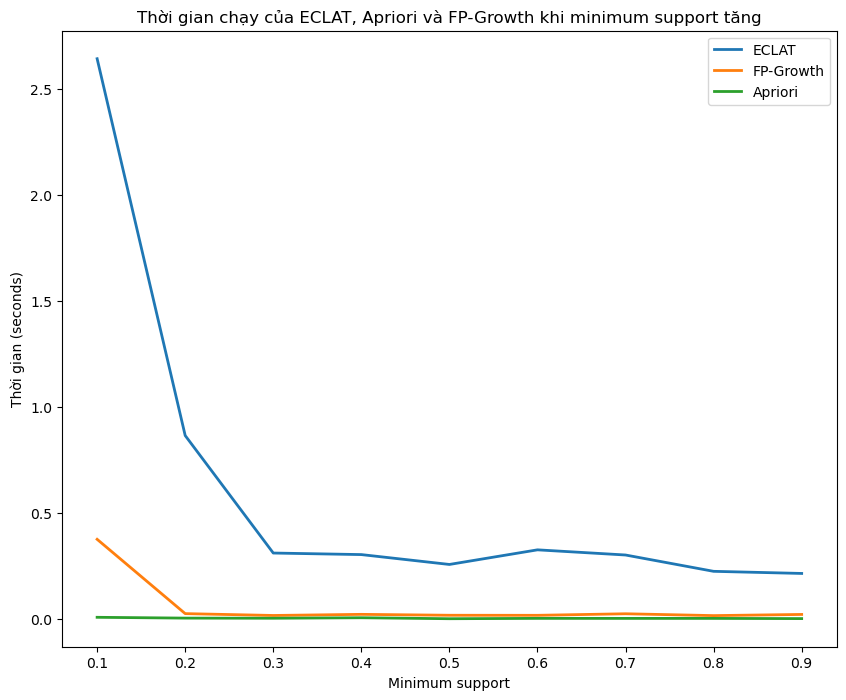

In [19]:
print('apriori average time:', sum(apriori_time_sup) / len(apriori_time_sup))
print('fp-growth average time:', sum(fpgrowth_time_sup) / len(fpgrowth_time_sup))
print('eclat average time:', sum(eclat_time_sup) / len(eclat_time_sup))

plt.figure(figsize=(10,8))
plt.plot(minSup, eclat_time_sup, label='ECLAT', linewidth=2)
plt.plot(minSup, fpgrowth_time_sup, label='FP-Growth', linewidth=2)
plt.plot(minSup, apriori_time_sup, label='Apriori', linewidth=2)
plt.legend()
plt.xlabel('Minimum support')
plt.ylabel('Thời gian (seconds)')
plt.title('Thời gian chạy của ECLAT, Apriori và FP-Growth khi minimum support tăng')

## When size of frequent itemset increases

In [20]:
max_size = len(books.columns)

In [ ]:
apriori_time_freq = []
fpgrowth_time_freq = []
eclat_time_freq = []
for comb in range(max_size):
    #Time of FP-Growth
    fpgrowth_start = time.time()
    fpgrowth_instance = fpgrowth(books, min_support=0.1, max_len=comb, use_colnames=True)
    fpgrowth_end = time.time()
    fpgrowth_time_freq.append(fpgrowth_end - fpgrowth_start)

    #Time of ECLAT
    eclat_instance = pe.ECLAT(data=result_df,verbose=True)
    eclat_start = time.time()
    rules_ind, rule_freq = eclat_instance.fit(min_support=0.1, min_combination=min_combination, max_combination=comb, separator=' & ', verbose=True)
    eclat_end = time.time()
    eclat_time_freq.append(eclat_end - eclat_start)
    
    #Time of Apriori
    apriori_start = time.time()
    apriori_instance = apriori(apriori_data, min_support=0.1, max_len=comb, use_colnames=True)
    apriori_end = time.time()
    apriori_time_freq.append(apriori_end - apriori_start)

apriori average time: 0.00948687033219771
fp-growth average time: 0.1985185146331787
eclat average time: 1.5908592614260586


Text(0.5, 1.0, 'Thời gian chạy của ECLAT, Apriori và FP-Growth khi Frequent Itemset size tăng')

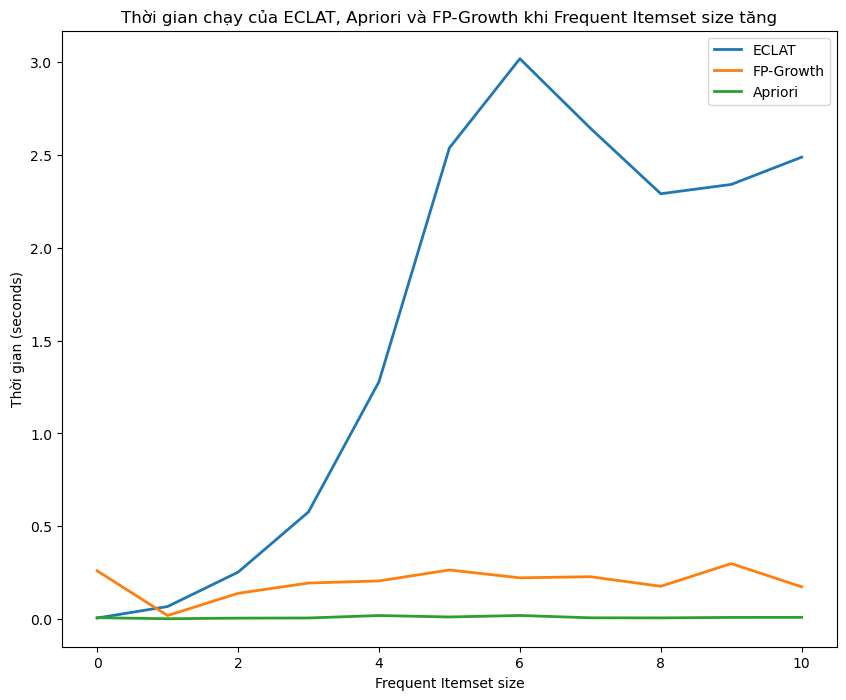

In [22]:
print('apriori average time:', sum(apriori_time_freq) / len(apriori_time_freq))
print('fp-growth average time:', sum(fpgrowth_time_freq) / len(fpgrowth_time_freq))
print('eclat average time:', sum(eclat_time_freq) / len(eclat_time_freq))

plt.figure(figsize=(10,8))
plt.plot(range(max_size), eclat_time_freq, label='ECLAT', linewidth=2)
plt.plot(range(max_size), fpgrowth_time_freq, label='FP-Growth', linewidth=2)
plt.plot(range(max_size), apriori_time_freq, label='Apriori', linewidth=2)
plt.legend()
plt.xlabel('Frequent Itemset size')
plt.ylabel('Thời gian (seconds)')
plt.title('Thời gian chạy của ECLAT, Apriori và FP-Growth khi Frequent Itemset size tăng')